## Assignment 9

#### 1.复习上课内容。

#### 2.回答以下理论问题。

2.1 简述skip-gram和cbow的区别 ?
cbow和skip-gram都是在word2vec中用于将文本进行向量表示的实现方法，cbow输入是某一个特征词的上下文相关的词对应的词向量，而输出就是这特定的一个词的词向量；skip-gram输入是特定的一个词的词向量，而输出是特定词对应的上下文词向量

2.2 缺少预料的情况下skip-gram和cbow哪个模型训练效果会更好？ 为什么？
当数据量较少时候，优先选择skip-gram，相比cbow会有更多的样本可以训练

2.3 negative sampling怎么减少训练的时间复杂度？
本来有V个词来预测一个词，负采样从其它V-1个词挑选K个词当作负样本，变成利用这一个正例和k个负例来进行训练

2.4 Glove的基本想法是什么？
glove考虑全局语义的相关性，通过概率之间的比值来反应词之间的相关性，相关的话比值会大一些。基于全局语料库、并结合上下文语境构建词向量，结合了LSA和word2vec的优点

2.5 本节课所学的skip-gram, cbow 和glove 词向量有什么缺点 ？
这些方法得到的词向量是固定表征的，无法解决一词多义问题

#### 3.实践题

在本题，需要你利用gensim库训练文本的词向量并对一些词进行可视化展示所学词向量能反应语意信息。

数据下载地址：https://dumps.wikimedia.org/zhwiki/20200301/zhwiki-20200301-pages-articles-multistream.xml.bz2

你需要用维基百科提供的extractor来提取数据：https://github.com/attardi/wikiextractor

你可能需要参考gensim的文档：https://radimrehurek.com/gensim/models/word2vec.html

你可能需要使用t-sne做可视化：https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive/  sample_data/


In [2]:
!apt-get install yum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  debugedit libdw1 liblua5.2-0 libmagic-mgc libmagic1 librpm8 librpmbuild8
  librpmio8 librpmsign8 libsqlite0 python-libxml2 python-lzma python-pycurl
  python-rpm python-sqlite python-sqlitecachec python-urlgrabber rpm
  rpm-common rpm2cpio
Suggested packages:
  rpm-i18n file libcurl4-gnutls-dev python-pycurl-dbg python-pycurl-doc
  python-sqlite-dbg alien elfutils rpmlint rpm2html
The following NEW packages will be installed:
  debugedit libdw1 liblua5.2-0 libmagic-mgc libmagic1 librpm8 librpmbuild8
  librpmio8 librpmsign8 libsqlite0 python-libxml2 python-lzma python-pycurl
  python-rpm python-sqlite python-sqlitecachec python-urlgrabber rpm
  rpm-common rpm2cpio yum
0 upgraded, 21 newly installed, 0 to r

In [3]:
!git clone https://github.com/BYVoid/OpenCC

Cloning into 'OpenCC'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 9735 (delta 41), reused 32 (delta 20), pack-reused 9661
Receiving objects: 100% (9735/9735), 8.35 MiB | 18.12 MiB/s, done.
Resolving deltas: 100% (6389/6389), done.


In [4]:
!apt-get install cmake

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [5]:
!apt-get install doxygen

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libxapian30
Suggested packages:
  doxygen-latex doxygen-doc doxygen-gui xapian-tools
The following NEW packages will be installed:
  doxygen libxapian30
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,512 kB of archives.
After this operation, 18.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libxapian30 amd64 1.4.5-1ubuntu0.1 [631 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 doxygen amd64 1.8.13-10 [3,880 kB]
Fetched 4,512 kB in 1s (4,329 kB/s)
Selecting previously unselected package libxapian30:amd64.
(Reading database ... 145065 files and directories currently installed.)
Preparing to unpack .../l

In [6]:
import os
os.chdir('/content/OpenCC')
%ls

AUTHORS            BUILD.md        LICENSE       package.json       src/
bdist_array.bash*  CMakeLists.txt  Makefile      package-lock.json  test/
bdist_array.cmd    data/           NEWS.md       python/            test.cmd
binding.gyp        deps/           node/         README.md
build.cmd          doc/            opencc.pc.in  setup.py


In [7]:
!make
!make install

mkdir -p build/rel
(cd build/rel; cmake \
-DBUILD_DOCUMENTATION:BOOL=ON \
-DENABLE_GTEST:BOOL=OFF \
-DENABLE_BENCHMARK:BOOL=OFF \
-DCMAKE_BUILD_TYPE=Release \
-DCMAKE_INSTALL_PREFIX=/usr \
../..)
-- The CXX compiler identification is GNU 7.5.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Use bundled marisa library.
-- Performing Test COMPILER_HAS_HIDDEN_VISIBILITY
-- Performing Test COMPILER_HAS_HIDDEN_VISIBILITY - Success
-- Performing Test COMPILER_HAS_HIDDEN_INLINE_VISIBILITY
-- Performing Test COMPILER_HAS_HIDDEN_INLINE_VISIBILITY - Success
-- Performing Test COMPILER_HAS_DEPRECATED_ATTR
-- Performing Test COMPILER_HAS_DEPRECATED_ATTR - Success
-- Found Doxygen: /usr/bin/doxygen (found version "1.8.13") found components:  doxygen dot 
-- Found PythonInterp: /usr/local/bi

In [8]:
!echo ‘简体转繁体’ | opencc -c s2tw

‘簡體轉繁體’


In [9]:
os.chdir('/content/')
%ls

drive/  OpenCC/  sample_data/


In [10]:
!git clone https://github.com/attardi/wikiextractor.git

Cloning into 'wikiextractor'...
remote: Enumerating objects: 613, done.
remote: Total 613 (delta 0), reused 0 (delta 0), pack-reused 613
Receiving objects: 100% (613/613), 1.24 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (352/352), done.


In [13]:
!wget https://dumps.wikimedia.org/zhwiki/20200420/zhwiki-20200420-pages-articles-multistream2.xml-p162887p544644.bz2

--2020-07-21 11:18:25--  https://dumps.wikimedia.org/zhwiki/20200420/zhwiki-20200420-pages-articles-multistream2.xml-p162887p544644.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217643014 (208M) [application/octet-stream]
Saving to: ‘zhwiki-20200420-pages-articles-multistream2.xml-p162887p544644.bz2’

zhwiki-20200420-pag 100%[===================>] 207.56M  5.01MB/s    in 41s     

2020-07-21 11:19:06 (5.08 MB/s) - ‘zhwiki-20200420-pages-articles-multistream2.xml-p162887p544644.bz2’ saved [217643014/217643014]



In [ ]:
# 使用WikiExtractor提取文章，会在指定目录下产生一个AA的文件夹，里面会包含很多的文件。
!python /content/wikiextractor/WikiExtractor.py -b 100M -o zhwiki zhwiki-20200420-pages-articles-multistream2.xml-p162887p544644.bz2

In [16]:
# 中文简体和繁体的转换,因为维基百科语料库中的文章内容里面的简体和繁体是混乱的
# 所以我们需要将所有的繁体字转换成为简体。这里我们利用OpenCC来进行转换。
# OpenCC的使用教程请参考：https://blog.csdn.net/sinat_29957455/article/details/81290356
# 正则表达式提取文章内容并进行分词
!opencc -i zhwiki/AA/wiki_00 -o /content/zhwiki/zh_wiki_00 -c t2s.json
!opencc -i zhwiki/AA/wiki_00 -o /content/zhwiki/zh_wiki_01 -c t2s.json
# !opencc -i zhwiki/AA/wiki_00 -o zh_wiki_02 -c t2s.json

In [ ]:
# !cp zh_wiki_00 '/content/zhwiki'
# !cp zh_wiki_01 '/content/zhwiki'
# !cp zh_wiki_02 '/content/zhwiki'

In [21]:
import logging, jieba, os, re
def get_stopwords():
    '''
    加载停用词表，去掉一些噪声
    :return:
    '''
    logging.basicConfig(format='%(asctime)s:%(levelname)s:%(message)s', level=logging.INFO)
    # 加载停用词表
    stopword_set = set()
    with open("/content/stopwords.txt", 'r', encoding="utf-8") as stopwords:  
        for stopword in stopwords:
            stopword_set.add(stopword.strip("\n"))
    return stopword_set


def parse_zhwiki(read_file_path, save_file_path):
    '''
    使用正则表达式解析文本
    '''
    # 过滤掉<doc>
    regex_str = "[^<doc.*>$]|[^</doc>$]"
    file = open(read_file_path, "r", encoding="utf-8")
    # 写文件
    output = open(save_file_path, "w+", encoding="utf-8")
    content_line = file.readline()
    # 获取停用词表
    stopwords = get_stopwords()
    # 定义一个字符串变量，表示一篇文章的分词结果
    article_contents = ""
    while content_line:
        match_obj = re.match(regex_str, content_line)
        content_line = content_line.strip("\n")
        if len(content_line) > 0:
            if match_obj:
                # 使用jieba进行分词
                words = jieba.cut(content_line, cut_all=False)
                for word in words:
                    if word not in stopwords:
                        article_contents += word + " "
            else:
                if len(article_contents) > 0:
                    output.write(article_contents + "\n")
                    article_contents = ""
        content_line = file.readline()
    output.close()


def generate_corpus():
    '''
    将维基百科语料库进行分类
    '''
    zhwiki_path = "./zhwiki/"  # 加载zhwiki的路径
    save_path = "./data/"  # 保存zhwiki的路径
    for i in range(2):
        file_path = os.path.join(zhwiki_path, str("zh_wiki_0%s" % str(i)))
        parse_zhwiki(file_path, os.path.join(save_path, "wiki_corpus0%s" % str(i)))


def merge_corpus():
    '''
    合并分词后的文件
    '''
    output = open("./data/wiki_corpus", "w", encoding="utf-8")
    input = "./data/"
    for i in range(2):
        file_path = os.path.join(input, str("wiki_corpus0%s" % str(i)))
        file = open(file_path, "r", encoding="utf-8")
        line = file.readline()
        while line:
            output.writelines(line)
            line = file.readline()
        file.close()
    output.close()


if __name__ == "__main__":
    generate_corpus()
    merge_corpus()

In [ ]:
# !cp /content/data/wiki_corpus '/content/drive/My Drive/NLP'

In [22]:
import logging  
from gensim.models import word2vec
 
logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s",level=logging.INFO)
sentences = word2vec.LineSentence("./data/wiki_corpus")
model = word2vec.Word2Vec(sentences,size=200,min_count=10,window=5)
model.save("data/word2vec_gensim")
model.wv.save_word2vec_format("./data/word2vec_org","./data/vocabulary",binary=False)

2020-07-21 12:03:17,319:INFO:EPOCH 4 - PROGRESS: at 68.43% examples, 312729 words/s, in_qsize 6, out_qsize 0
2020-07-21 12:03:18,323:INFO:EPOCH 4 - PROGRESS: at 69.58% examples, 312829 words/s, in_qsize 5, out_qsize 0
2020-07-21 12:03:19,350:INFO:EPOCH 4 - PROGRESS: at 70.63% examples, 312225 words/s, in_qsize 5, out_qsize 0
2020-07-21 12:03:20,355:INFO:EPOCH 4 - PROGRESS: at 71.61% examples, 311692 words/s, in_qsize 5, out_qsize 0
2020-07-21 12:03:21,396:INFO:EPOCH 4 - PROGRESS: at 72.41% examples, 310387 words/s, in_qsize 5, out_qsize 0
2020-07-21 12:03:22,432:INFO:EPOCH 4 - PROGRESS: at 73.33% examples, 309449 words/s, in_qsize 5, out_qsize 0
2020-07-21 12:03:23,458:INFO:EPOCH 4 - PROGRESS: at 74.14% examples, 308696 words/s, in_qsize 6, out_qsize 0
2020-07-21 12:03:24,504:INFO:EPOCH 4 - PROGRESS: at 75.11% examples, 308010 words/s, in_qsize 5, out_qsize 0
2020-07-21 12:03:25,546:INFO:EPOCH 4 - PROGRESS: at 76.15% examples, 307756 words/s, in_qsize 6, out_qsize 0
2020-07-21 12:03:26

In [68]:

# 可视化
from sklearn.manifold import TSNE
import numpy as np
# import matplotlib.pyplot as plt
import random
 
#因为词向量文件比较大 随机抽取一些词可视化
words = list(model.wv.vocab)
random.shuffle(words)

# 设置需要可视化词的数目
num = 300
rand_words = words[:num]

vector = model[rand_words]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [69]:
tsne = TSNE(n_components=2,init='pca',verbose=1)

In [70]:
embedd = tsne.fit_transform(vector)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.009s...
[t-SNE] Computed neighbors for 300 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 0.548678
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.672447
[t-SNE] KL divergence after 1000 iterations: 1.142997


In [64]:
from os import path
from matplotlib.font_manager import fontManager
 
for i in fontManager.ttflist:
    print(i.fname, i.name)

/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf DejaVu Sans
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf STIXGeneral
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf DejaVu Sans
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf STIXNonUnicode
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf DejaVu Serif
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf STIXSizeOneSym
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf DejaVu Serif
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf STIXSizeFourSym
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf cmss10
/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf cmex10
/usr/local/lib

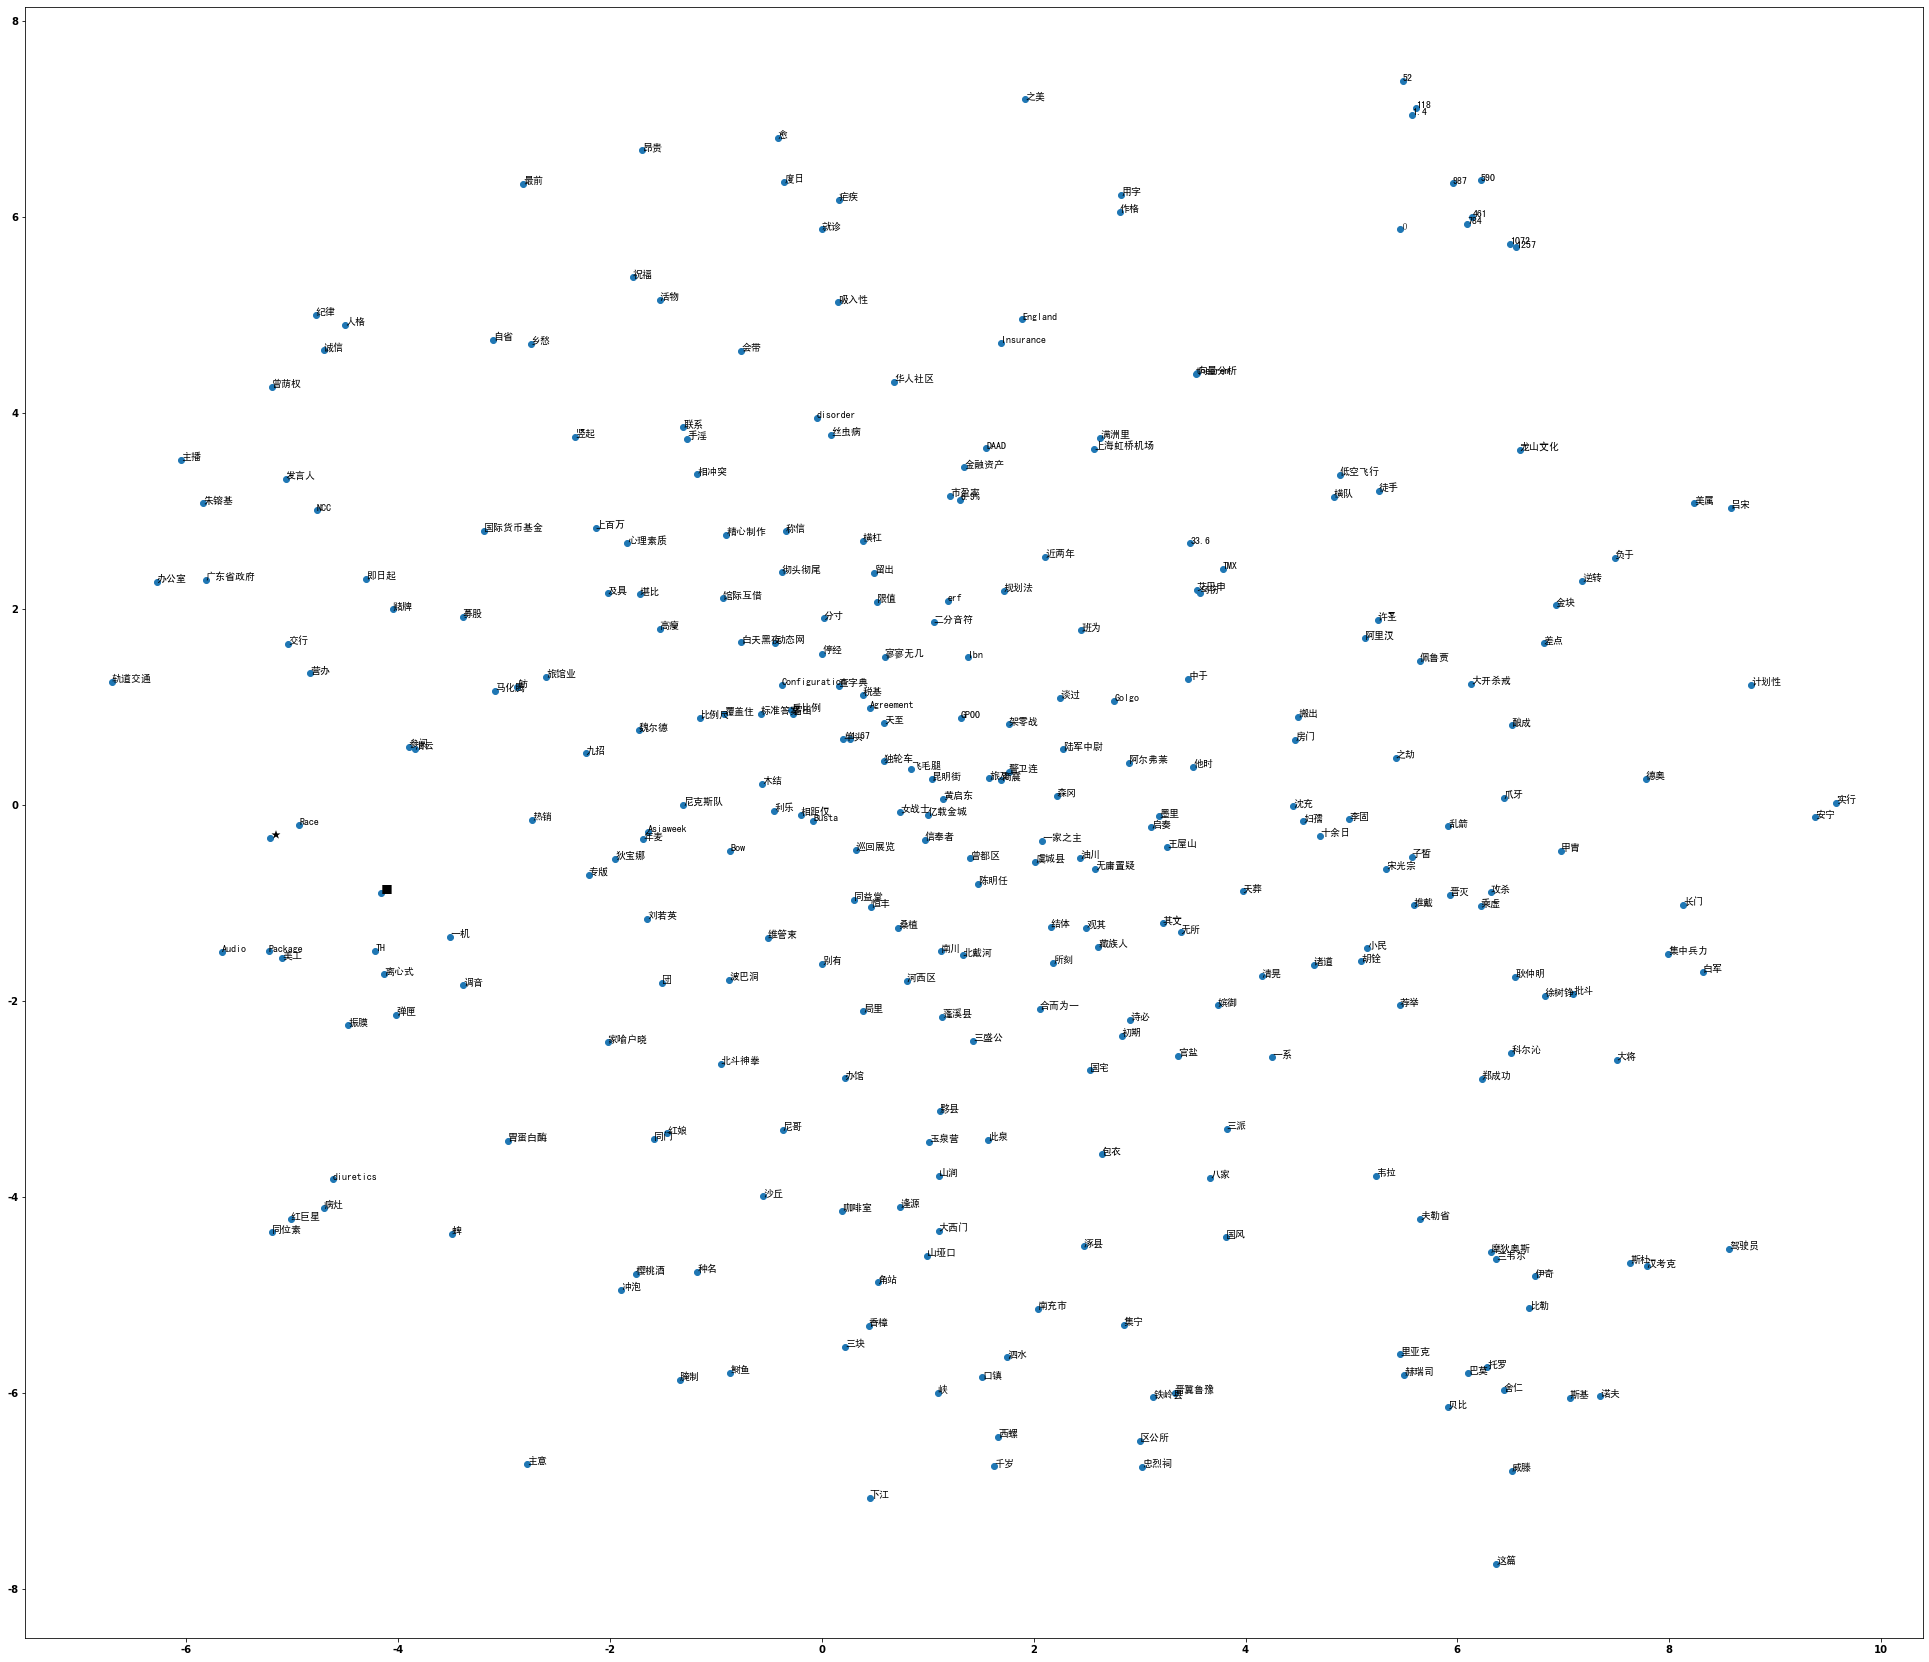

In [74]:
import matplotlib.pyplot as plt

#可视化
myfont = matplotlib.font_manager.FontProperties(fname='/content/SimHei.ttf')  
# plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
# plt.rcParams['font.family'] = ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(34,30))
plt.scatter(embedd[:num,0], embedd[:num,1])
for i in range(num):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i],fontproperties=myfont)
plt.show()